In [1]:
import pandas as pd 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("F:\machine learning\ML\Linear Regression\car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df['Age'] = (2026 - df['Year'])

In [8]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,12
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,10
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,11
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,17
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,9


In [9]:
df.drop(columns = 'Year',inplace=True)

In [10]:
corr = df.corr(numeric_only = True)

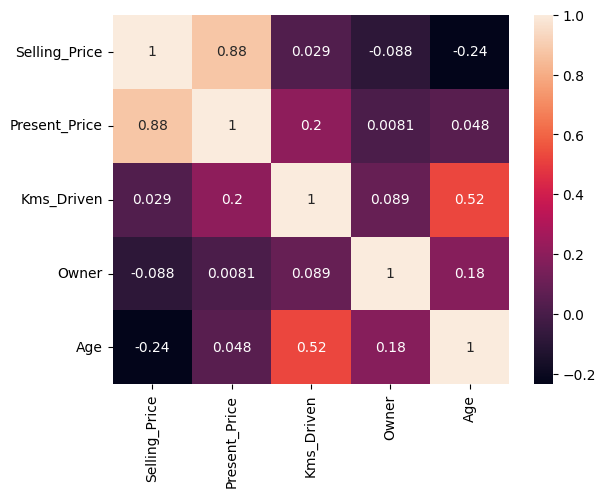

In [11]:
sns.heatmap(corr,annot=True);

In [12]:
for i in df.select_dtypes(include= 'object').columns:
    print(f'{i}----{df[i].unique()},-----{df[i].nunique()}')

Car_Name----['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 

**Encoding Catogiraical Columns**

In [13]:
df1 = pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first = True)

In [14]:
df1.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,12,False,True,False,True
1,sx4,4.75,9.54,43000,0,13,True,False,False,True


In [15]:
df1['Car_Name'].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [16]:
df2 = df1.groupby(['Car_Name'])['Selling_Price'].agg(['mean']).reset_index()
df2

,Car_Name,mean
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
...,...,...
93,sx4,3.158333
94,verna,6.107857
95,vitara brezza,9.250000
96,wagon r,2.512500


In [17]:
df3 = pd.merge(df1,df2,on='Car_Name')
df3

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,mean
0,ritz,3.35,5.59,27000,0,12,False,True,False,True,2.862500
1,sx4,4.75,9.54,43000,0,13,True,False,False,True,3.158333
2,ciaz,7.25,9.85,6900,0,9,False,True,False,True,7.472222
3,wagon r,2.85,4.15,5200,0,15,False,True,False,True,2.512500
4,swift,4.60,6.87,42450,0,12,True,False,False,True,4.540000
...,...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,10,True,False,False,True,7.419231
297,brio,4.00,5.90,60000,0,11,False,True,False,True,4.745000
298,city,3.35,11.00,87934,0,17,False,True,False,True,7.419231
299,city,11.50,12.50,9000,0,9,True,False,False,True,7.419231


In [18]:
x = df3.drop(columns=['Car_Name','Selling_Price'])

In [19]:
y = df3['Selling_Price']

In [20]:
x

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,mean
0,5.59,27000,0,12,False,True,False,True,2.862500
1,9.54,43000,0,13,True,False,False,True,3.158333
2,9.85,6900,0,9,False,True,False,True,7.472222
3,4.15,5200,0,15,False,True,False,True,2.512500
4,6.87,42450,0,12,True,False,False,True,4.540000
...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,10,True,False,False,True,7.419231
297,5.90,60000,0,11,False,True,False,True,4.745000
298,11.00,87934,0,17,False,True,False,True,7.419231
299,12.50,9000,0,9,True,False,False,True,7.419231


In [21]:
ss = StandardScaler()

In [22]:
x_scaled = ss.fit_transform(x)

In [23]:
x.to_csv('car_x.csv',index=False)

In [24]:
y.to_csv('car_y.csv',index=False)

In [25]:
x_train, x_test, y_train , y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=1)

In [26]:
x_test.shape

(61, 9)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
print(lr.intercept_)
print(lr.coef_)

4.6953172944868715
[ 2.69215621 -0.20729746  0.09929783 -1.17598968  0.49571499 -0.02234284
 -0.37628188 -0.59221912  1.40181488]


In [38]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([ 2.40165136e+00,  9.84672223e+00,  5.91580990e+00, -1.10996434e+00,
        1.00397621e+00, -3.53466013e-01,  4.55200967e-01,  6.65126480e+00,
       -1.50732128e-01,  7.73437206e+00,  8.33470579e+00,  7.81999443e+00,
        8.37507310e-01,  1.27190300e+00,  1.44584081e+00,  2.01176837e+00,
        8.28538534e+00,  9.83369849e+00,  4.19303802e+00,  3.72128208e+00,
        1.98359664e+00,  1.25008506e+01,  1.12761444e+01,  1.75101591e+00,
        5.94654277e+00,  2.03152882e+00,  1.43266327e+00,  1.46384861e+00,
        6.19717974e+00,  4.63051658e+00,  5.92621777e+00,  2.60793451e+00,
        2.17526533e+00,  1.09478070e+01,  1.06640360e+01, -2.56491780e-01,
        1.13672069e+00,  4.05557830e-01,  7.51285195e-01,  1.67736334e+00,
        8.18797396e+00,  2.77958735e+00,  1.80695614e+01,  3.84067527e+00,
       -2.46524470e-01,  3.61719377e-01,  1.80067473e+00,  7.63464309e-01,
        1.25487793e+01,  4.30098032e+00,  8.07888701e+00,  5.66486356e+00,
       -1.65013080e+00,  

In [35]:
r2_score(y_pred_train,y_train)

0.878367044689903

In [36]:
y_pred_test = lr.predict(x_test)

In [37]:
r2_score(y_pred_test,y_test)

0.9070807218443514